In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import math
import numpy as np
import itertools

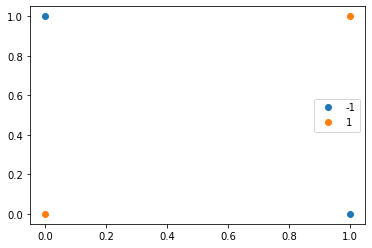

In [2]:
# a) Visualization


samples = pd.DataFrame({
    'x': [1, 0, 1, 0],
    'y': [1, 0, 0, 1],
    'label': [1, 1, -1, -1]
})
for name, group in samples.groupby('label'):
    plt.plot(group['x'], group['y'], marker="o", linestyle="",label=name)

plt.legend()



# b) Network implementation

I chose a two layer fully connected network with no hidden layers. I believe this is the simplest model that can still learn XOR. 

I am using relu as my activation function, and mean squared error loss.


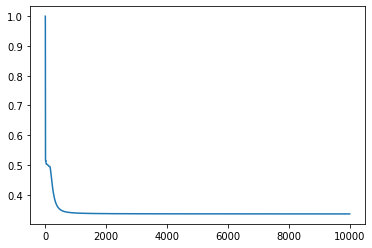

In [146]:

# b) Network implementation
# I chose a three layer fully connected network with one hidden layer and mean squared error loss. 
np.random.seed(42)

# activation functions
def relu(x):
    return max(0, x)
def d_relu(x):
    return max(0, min(x, 1))    
def tanh(x):
    return math.tanh(x)
def d_tanh(x):
    return 1 - tanh(x) ** 2
def loss(exp_y, act_y):
    return .5 * (exp_y - act_y) ** 2

# model
class Neuron:
    def __init__(self, activation_fn=relu):
        # self.weights = np.random.rand(3)        
        self.weights = np.array([1, 1, 1])
        self.activation_fn = activation_fn

    def pred(self, x):
        pre_activation = self.weights @ np.concatenate((x, [1]))
        return self.activation_fn(pre_activation)
    
    def update(self, partials, lr):
        # print(partials)
        self.weights = self.weights - partials * lr


class NumpyModel:    
    def  __init__(self, lr=.1):
        self.input_layer = [Neuron(), Neuron()]
        self.output_layer = Neuron(activation_fn=tanh)
        self.lr = lr
    
    def pred(self, x):
        return self.output_layer.pred([self.input_layer[0].pred(x), self.input_layer[1].pred(x)])
    
    def update(self, exp_y, act_y, x):
        # Update output neuron
        partial_exp_y = d_tanh(exp_y) * np.array([self.input_layer[0].pred(x), self.input_layer[1].pred(x), 1])
        partial_l = (exp_y - act_y) * partial_exp_y        

        # Update input neuron 
        def update_input_layer(index, neuron):                                 
            neuron.update((exp_y - act_y) * d_tanh(exp_y)  * self.output_layer.weights[index] * d_relu(neuron.weights @ np.concatenate((x, [1]))) * np.concatenate((x, [1])), self.lr)

        update_input_layer(0, self.input_layer[0])
        update_input_layer(1, self.input_layer[1])      

        self.output_layer.update(partial_l, self.lr)
        # print('o', self.output_layer.weights)


  


# Train with stochastic gradient descent
def sgd(model, train_x, train_y, iterations=4):    
    x_generator = itertools.cycle(train_x)
    y_generator = itertools.cycle(train_y)

    # print('starting new epoch')
    for j in range(len(train_x)):        
        x = next(x_generator)
        y = next(y_generator)        
        # print('Correct ans:', y)
        prediction = model.pred(x)      
        # print('Before update:', model.pred(x))
        # print(model.input_layer[0].weights)
        # print(model.input_layer[1].weights)
        # print(model.output_layer.weights)
        model.update(prediction, y, x)
        # print('After update:', model.pred(x))
        # print(model.input_layer[0].weights)
        # print(model.input_layer[1].weights)
        # print(model.output_layer.weights)
        # print()        
        

def test(model, test_x, test_y, verbose=False):
    exp_y = [model.pred(x) for x in test_x]  
    if verbose:
        print(test_x)        
        print(test_y, exp_y)  
    return np.mean(loss(exp_y, test_y))


def train(model, epochs=10):
    history = []    
    for epoch in range(epochs):
        loss = test(model, train_x, train_y)
        history.append(loss)
        sgd(model, train_x, train_y)
    return history



train_x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

train_y = np.array([1, -1, -1, 1])
m = NumpyModel(.1)
history = train(m, epochs=10000)
plt.plot(history)

In [148]:
test(m, train_x, train_y, verbose=True)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[ 1 -1 -1  1] [-0.40919869669440656, -0.4088063636273274, -0.4087261109486236, 0.9995535470333007]


0.3356194867058686

In [153]:
m.input_layer[0].pred([1, 1])

1.941536784752208